# Visualization of Clean vs Perturbed Datasets

This notebook visualizes encoded prefixes from clean and perturbed datasets in 2D space using PCA dimensionality reduction.

The visualization shows:
- **Blue dots**: Clean dataset prefixes
- **Orange dots**: Perturbed dataset prefixes

The goal is to demonstrate that perturbations remain close to the original data in the feature space.

In [1]:
import sys
import os
from pathlib import Path

# Add path to import from perturbation_logic
# Notebook is in robustness/perturbator/, module is in robustness/perturbator/perturbation_logic/
perturbation_logic_path = os.path.join(os.getcwd(), 'perturbation_logic')
if os.path.exists(perturbation_logic_path):
    sys.path.insert(0, perturbation_logic_path)
else:
    # Try alternative path if running from different directory
    perturbation_logic_path = 'perturbation_logic'
    if os.path.exists(perturbation_logic_path):
        sys.path.insert(0, perturbation_logic_path)

from visualization_backend import visualize_datasets, load_and_extract_prefixes

print("✓ Imports successful!")

✓ Imports successful!


## Setup: Define Data Paths

Set the paths to the clean and perturbed dataset files.

In [8]:
# Define paths to the datasets
# Adjust these paths if running from a different directory
base_path = Path('../../encoded_data/helpdesk')

clean_data_path = base_path / 'val.pkl'
perturbed_data_path = base_path / 'redo_activity.pkl'

print(f"Clean dataset: {clean_data_path}")
print(f"Perturbed dataset: {perturbed_data_path}")

# Check if files exist
if not clean_data_path.exists():
    print(f"⚠ Warning: Clean dataset not found at {clean_data_path}")
if not perturbed_data_path.exists():
    print(f"⚠ Warning: Perturbed dataset not found at {perturbed_data_path}")

Clean dataset: ../../encoded_data/helpdesk/val.pkl
Perturbed dataset: ../../encoded_data/helpdesk/redo_activity.pkl


## Data Statistics

Load and examine the datasets to understand their structure and dimensions.

In [9]:
# Load and extract prefixes to get statistics
try:
    clean_data = load_and_extract_prefixes(str(clean_data_path))
    perturbed_data = load_and_extract_prefixes(str(perturbed_data_path))
    
    print("=" * 60)
    print("Dataset Statistics")
    print("=" * 60)
    print(f"Clean dataset:")
    print(f"  - Number of samples: {len(clean_data)}")
    print(f"  - Feature dimensions: {clean_data.shape[1]}")
    print(f"\nPerturbed dataset:")
    print(f"  - Number of samples: {len(perturbed_data)}")
    print(f"  - Feature dimensions: {perturbed_data.shape[1]}")
    print("=" * 60)
    
    if clean_data.shape[1] != perturbed_data.shape[1]:
        print("⚠ Warning: Feature dimensions don't match!")
    else:
        print("✓ Feature dimensions match - ready for visualization")
        
except Exception as e:
    print(f"Error loading data: {e}")
    raise

Dataset Statistics
Clean dataset:
  - Number of samples: 1898
  - Feature dimensions: 288

Perturbed dataset:
  - Number of samples: 1898
  - Feature dimensions: 288
✓ Feature dimensions match - ready for visualization


## Visualization

Create a 2D scatter plot comparing clean and perturbed datasets using PCA dimensionality reduction.

Loading clean dataset from: ../../encoded_data/helpdesk/val.pkl
Loaded 1898 clean samples with 288 features
Loading perturbed dataset from: ../../encoded_data/helpdesk/redo_activity.pkl
Loaded 1898 perturbed samples with 288 features
Combining datasets for PCA fitting...
Fitting PCA model...
PCA explained variance: PC1=51.09%, PC2=18.56%, Total=69.65%


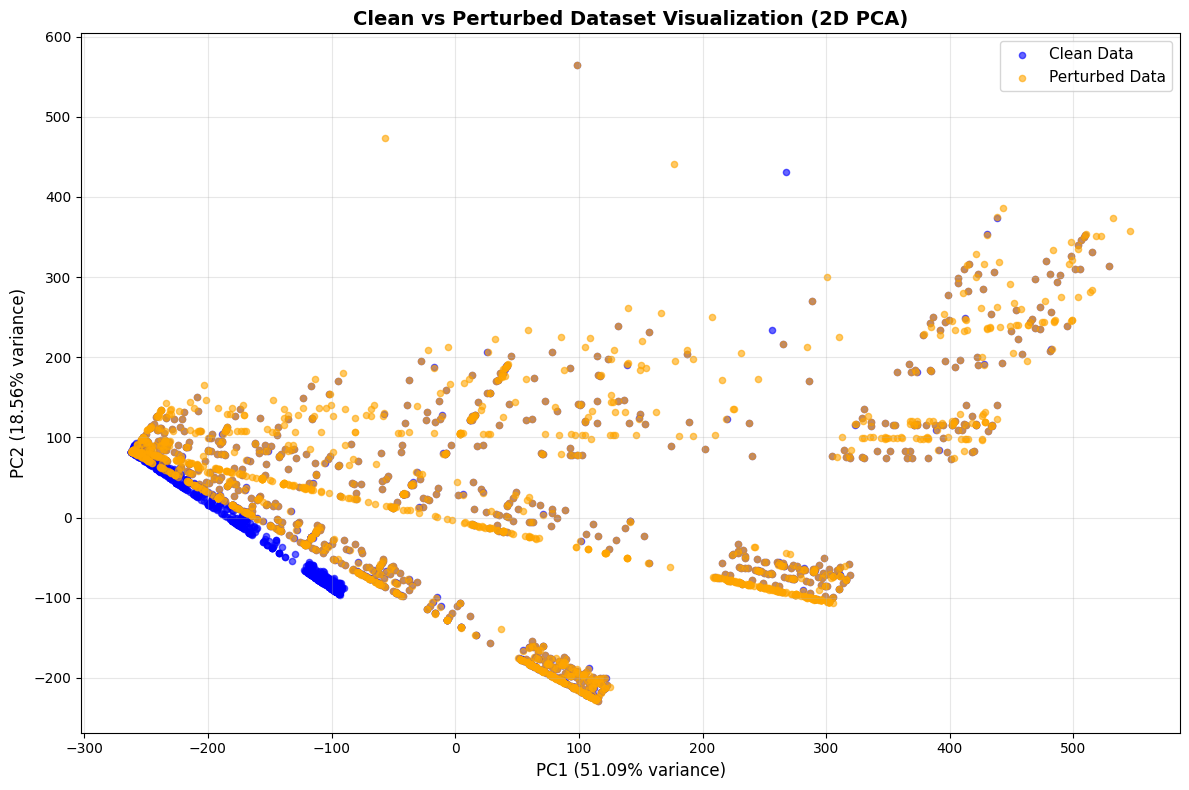

In [10]:
# Create visualization
visualize_datasets(
    clean_data_path=str(clean_data_path),
    perturbed_data_path=str(perturbed_data_path),
    output_path=None,  # Set to a path string to save the plot, e.g., 'visualization.png'
    alpha=0.6,  # Transparency level
    figsize=(12, 8)  # Figure size
)